# <center> Exploratory Data analysis

# Objective: classify the survivors of the treatment based on nodes or age

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
h=pd.read_csv("haberman.csv")

In [4]:
h.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
h.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


The data is presented over the period of 1958 to 1969.
Min age and Max age of patients is 30 and 83.
Eventhough Maximum number of nodes id 52, the mean number of nodes is only 4.02

In [5]:
h1=h.copy()
a=h1["status"].map({1:'Yes',2:'No'})

In [6]:
h1['status'].value_counts(normalize=True)

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

1    0.735294
2    0.264706
Name: status, dtype: float64

Inference:
The number of patients survived in the treatment is about 225 and the number not survived is 81
The percentage of survivors is about 74% and non-survivors is 26%



In [7]:
k=h1.groupby(['status'])
print('MAX',k.max())

MAX         age  year  nodes
status                  
1        77    69     46
2        83    69     52


The patient who survived with maximum nodes was having 46 nodes
The patient who doesn't survive with minimum nodes is  having 0 node

In [90]:
print('MIN',k.min())

MIN         age  year  nodes
status                  
No       34    58      0
Yes      30    58      0


The patient who survived with minimum node is having 0 node
The patient who doesn't survive with maximum nodes is having 52 nodes
So, it is difficult to classify based on nodes


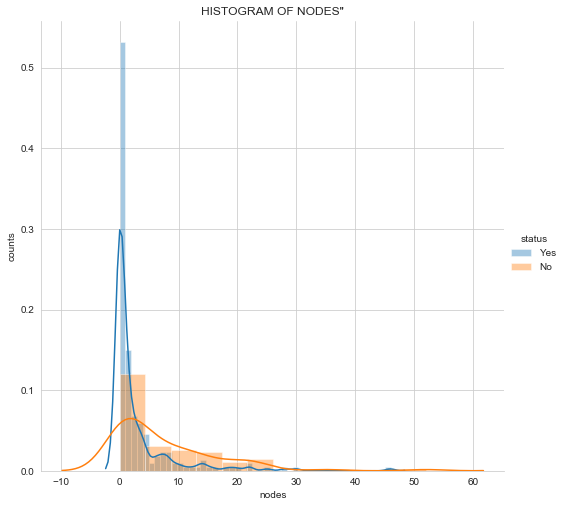

In [73]:
#UNIVARIATE ANALYSIS
sns.FacetGrid(h1, hue="status",height=7) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title('HISTOGRAM OF NODES"') 
plt.ylabel('counts')    
plt.show();


OBSERVATION:
The spread of nodes of  patients who survived is narrow while the spread of nodes of  
patients who didn't survive is very wide 
The histogram for survivors and non survivors overlap. But the patients survival can be arrived based on nodes on 
further exploration of data

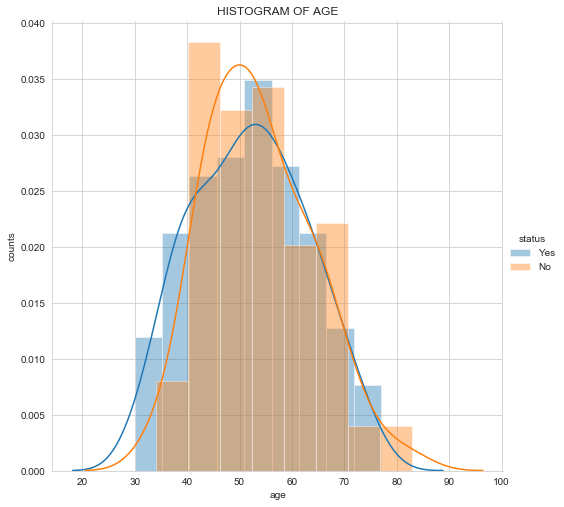

In [71]:
sns.FacetGrid(h1, hue="status",height=7) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title('HISTOGRAM OF AGE') 
plt.ylabel('counts')    
plt.show();


OBSERVATION:
The histogram for surviors and non survivors is overlapping one over the other. 
so categorising based on age for survival is difficult.So don't want to concentrate on AGE  for classifying survivals. 

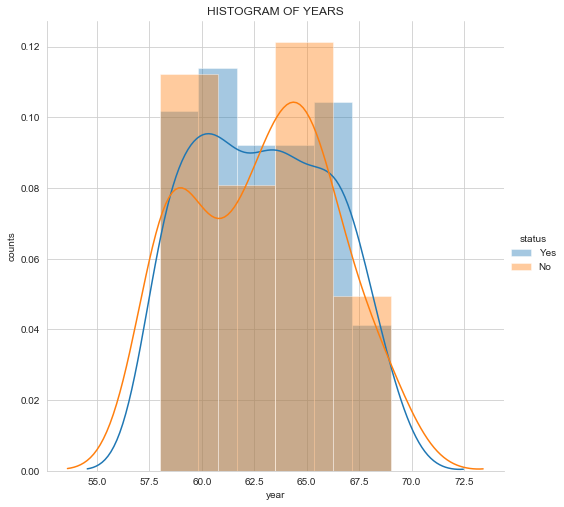

In [72]:
sns.FacetGrid(h1, hue="status",height=7) \
   .map(sns.distplot, "year") \
   .add_legend()
plt.title('HISTOGRAM OF YEARS') 
plt.ylabel('counts')                  
plt.show();


OBSERVATION:
This histogram shows that the year does not help for classifying survivors,
since the number of death and survivals are the nearly the same over the years 

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


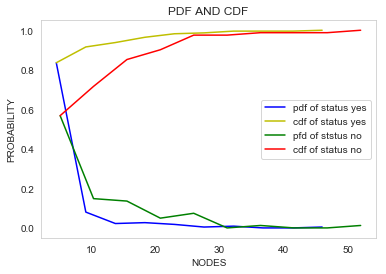

In [88]:
h1_Yes = h1.loc[h1["status"] == "Yes"];
h1_No = h1.loc[h1["status"] == "No"];
counts, bin_edges = np.histogram(h1_Yes['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'-b',label='pdf of status yes');
plt.plot(bin_edges[1:],cdf,'-y',label='cdf of status yes')

counts, bin_edges = np.histogram(h1_No['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,'g',label='pfd of ststus no');
plt.plot(bin_edges[1:],cdf,'-r',label='cdf of status no')
d=pdf
plt.grid()
plt.legend(loc='center right')
plt.title('PDF AND CDF') 
plt.ylabel('PROBABILITY')
plt.xlabel('NODES')
plt.show()


OBSERVATION:
 Patients having nodes nearly 2 to 3 are survivors with 82% probability  based on CDF of SURVIVORS(ORANGE line)
 Patients having nodes nearly 4 and above are NON-survivors with 57% probability  based on CDF of NON-SURVIVORS(RED line)

In [49]:
#Mean
print("Mean of nodes for survivors=",np.mean(h1_Yes["nodes"]))
print("Mean of nodes for not survivors=",np.mean(h1_No["nodes"]))

Mean of nodes for survivors= 2.7911111111111113
Mean of nodes for not survivors= 7.45679012345679


OBSERVATION:
Mean of the nodes show the patients who survived is about 2.8
but the mean of nodes of the patients who doesn't survive is 7.45


In [21]:
#Median
print("Median of nodes for survivors=",np.median(h1_Yes["nodes"]))
print("Median of nodes for not survivors=",np.median(h1_No["nodes"]))

Median of nodes for survivors= 0.0
Median of nodes for not survivors= 4.0


OBSERVATION:
The median is 0 and mean is 2.79 for survivors, so the dataset is RIGHT SKEWED
The median is 4 and mean is 27.45 for NON-survivors, so the dataset is RIGHT SKEWED


In [48]:
#STD. DEVIATION
print("Std deviation of nodes for the survivors is =",np.std(h1_Yes['nodes']))
print("Std deviation of nodes for the non-survivors is =",np.std(h1_No['nodes']))

Std deviation of nodes for the survivors is = 5.857258449412131
Std deviation of nodes for the non-survivors is = 9.128776076761632


In [39]:
from statsmodels import robust
print("Mean Absolute Deviation of nodes for survivors =",robust.mad(h1_Yes["nodes"]))
print("Mean Absolute Deviation of nodes for not survivors =",robust.mad(h1_No["nodes"]))

Mean Absolute Deviation of nodes for survivors = 0.0
Mean Absolute Deviation of nodes for not survivors = 5.930408874022408


OBSERVATION:
The STD DEVIATION is 5.85 and MEAN ABSOLUTE DEVIATION is 0 for survivors, so the dataset is RIGHT SKEWED
The STD DEVIATION is 9.13 and MEAN ABSOLUTE DEVIATION is 5.93 for NON-survivors, so the dataset is RIGHT SKEWED


In [47]:
#90th percentile
print('90 th percentile of nodes is =',np.percentile(h1_Yes['nodes'],90))

90 th percentile of nodes is = 8.0


 90 th percentile of patients who survived had 8 nodes 

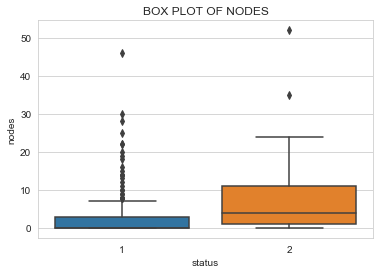

In [84]:
sns.boxplot(x='status',y='nodes',data=h).set_title('BOX PLOT OF NODES')

plt.show()

OBSERVATION:
Box plot shows the patients having nodes <3 are most likely to survive
But the patients having nodes>5 are most likely to not survive in the treatment

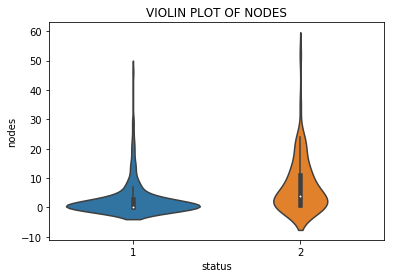

In [28]:
sns.violinplot(x='status',y='nodes',data=h).set_title('VIOLIN PLOT OF NODES')

plt.show()

OBSERVATION:
Violin plot also shows that survivors are more when the nodes are less then 3
And when the nodes more then 5 non-survivors are high

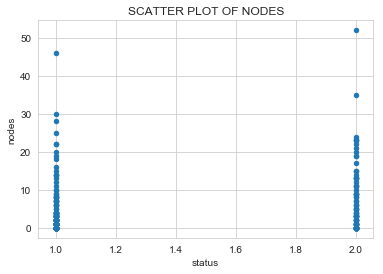

In [92]:
#2D scatter plot
h['status']=h['status'].map({1:1,2:2})
h.plot(kind='scatter',x='status',y='nodes')
plt.title('SCATTER PLOT OF NODES')

plt.show()

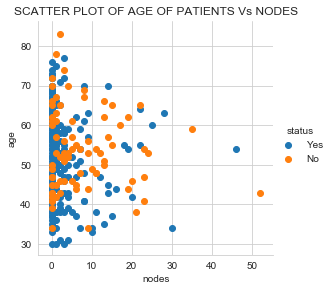

In [40]:
sns.set_style('whitegrid')

sns.FacetGrid(h1,hue='status',height=4)\
   .map(plt.scatter,'nodes','age')\
   .add_legend()
plt.title('SCATTER PLOT OF AGE OF PATIENTS Vs NODES')
plt.show()    

observation:
    The scatter plot defines that the survival does not depend only age or nodes
    

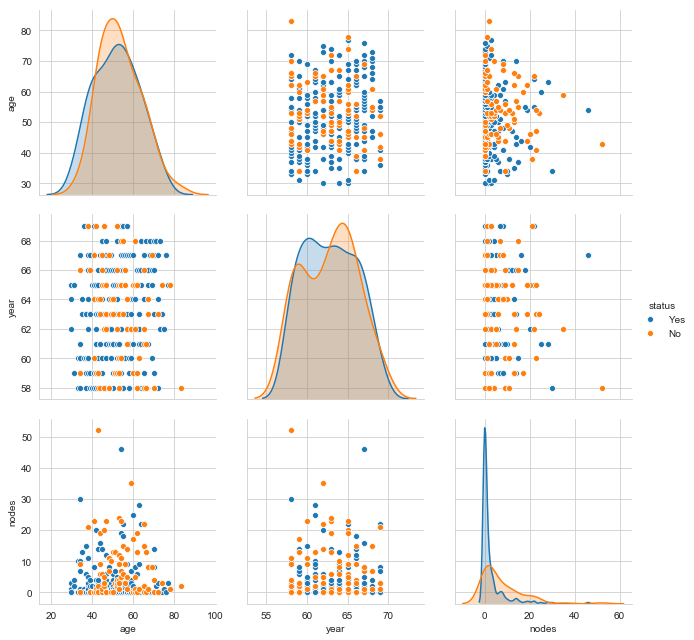

In [32]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(h1, hue="status", height=3);
plt.show()

OBSERVATION:
Pair plot shows that drawing a line to distinguish between survivors and non-survivors is difficult, 
Since, the data points are mixed with each other 

Conclusion:
    1.The classification of survival and death is difficult to conclude based on nodes and age.
    2.The univariate analysis directed to classify based on nodes, since the histogram plot of nodes 
      showed a way to clasify based on nodes
    3.But when tried to differentiate survivors and non-survoivors by drawing line or IF-ELSE condition, 
      the path to differentiate was not found.
    4.One major conclusion is that if the patient  has less number of nodes(i.e) less<7, the probability of survival is high
    5.The bivariate analysis did not help to differentiate based on scatter plot and pair plot, since drawing a line on plot  
      was difficult.